In [1]:
pip install pandas seaborn scikit-learn matplotlib imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import pandas as pd

train_data = pd.read_csv('../dataset/train.csv')
test_data = pd.read_csv('../dataset/test.csv')

# Train Dataset
print("Train Dataset Overview:")
print(train_data.info())

print("\nTrain Unique Values in Each Column:")
unique_values = train_data.nunique()
print(unique_values)

print("\nTrain Sample Data:")
print(train_data.head())

numerical_columns_train = train_data.select_dtypes(include=['float64', 'int64'])

print("\nTrain Statistical Analysis of Numerical Columns:")
stats = numerical_columns_train.describe(percentiles=[0.25, 0.5, 0.75]).T
stats['std'] = numerical_columns_train.std()
print(stats)

stats.to_csv('numerical_column_stats_train.csv', index=True)


# Test Dataset
print("Test Dataset Overview:")
print(test_data.info())

print("\nTest Unique Values in Each Column:")
unique_values = test_data.nunique()
print(unique_values)

print("\nTest Sample Data:")
print(test_data.head())

numerical_columns_test = test_data.select_dtypes(include=['float64', 'int64'])

print("\nTest Statistical Analysis of Numerical Columns:")
stats = numerical_columns_test.describe(percentiles=[0.25, 0.5, 0.75]).T
stats['std'] = numerical_columns_test.std()
print(stats)

stats.to_csv('numerical_column_stats_test.csv', index=True)

Train Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6256 non-null   int64  
 1   Address         6256 non-null   object 
 2   Possesion       6256 non-null   object 
 3   Furnishing      6256 non-null   object 
 4   Buildup_area    6256 non-null   float64
 5   Carpet_area     6256 non-null   float64
 6   Bathrooms       6256 non-null   float64
 7   Property_age    6256 non-null   int64  
 8   Parking         6256 non-null   int64  
 9   Price           6256 non-null   int64  
 10  Brokerage       6256 non-null   float64
 11  Floor           6256 non-null   float64
 12  Per_sqft_price  6256 non-null   float64
 13  BHK             6256 non-null   float64
 14  Total_bedrooms  6256 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 733.3+ KB
None

Train Unique Values in Each Column

<>:14: SyntaxWarning: invalid escape sequence '\T'
<>:31: SyntaxWarning: invalid escape sequence '\T'
<>:35: SyntaxWarning: invalid escape sequence '\T'
<>:40: SyntaxWarning: invalid escape sequence '\T'
<>:14: SyntaxWarning: invalid escape sequence '\T'
<>:31: SyntaxWarning: invalid escape sequence '\T'
<>:35: SyntaxWarning: invalid escape sequence '\T'
<>:40: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\841692586.py:14: SyntaxWarning: invalid escape sequence '\T'
  print("\Train nSample Data:")
C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\841692586.py:31: SyntaxWarning: invalid escape sequence '\T'
  print("\Tes nUnique Values in Each Column:")
C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\841692586.py:35: SyntaxWarning: invalid escape sequence '\T'
  print("\Test nSample Data:")
C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\841692586.py:40: SyntaxWarning: invalid escape sequence '\T'
  print("\Test nStatistical Analysis o


Correlation with Target Variable:
index             0.053619
Buildup_area      0.840860
Carpet_area       0.895774
Bathrooms         0.359334
Property_age      0.069613
Parking           0.509753
Price             1.000000
Brokerage         0.671218
Floor             0.293367
Per_sqft_price    0.751061
BHK               0.681427
Total_bedrooms    0.670491
Name: Price, dtype: float64

Columns to Drop Due to Weak Correlation:
Index(['index', 'Property_age'], dtype='object')
Column 'index' was dropped due to weak correlation (0.05) with 'Price'.
Column 'Property_age' was dropped due to weak correlation (0.07) with 'Price'.

Processed train data saved to: dropped_cols_train_data.csv

Processed test data saved to: dropped_cols_test_data.csv


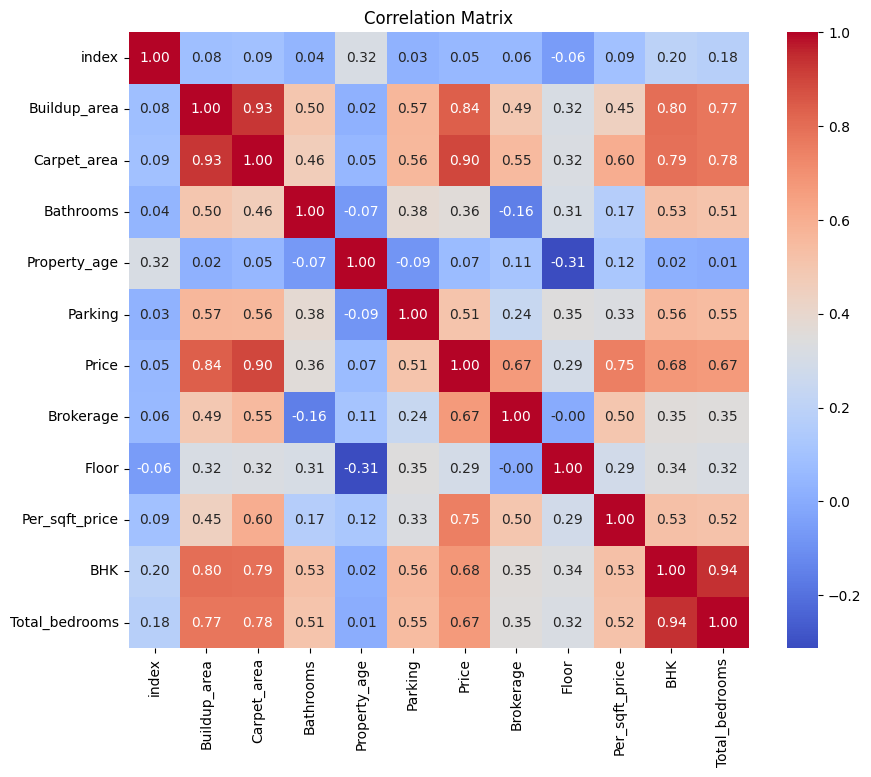

In [5]:
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

if 'Price' in correlation_matrix.columns:
    target_correlation = correlation_matrix['Price']
    print("\nCorrelation with Target Variable:")
    print(target_correlation)

    weak_correlation_columns = target_correlation[(target_correlation > -0.1) & (target_correlation < 0.1)].index
    print("\nColumns to Drop Due to Weak Correlation:")
    print(weak_correlation_columns)

    train_data = train_data.drop(columns=weak_correlation_columns)
    test_data = test_data.drop(columns=weak_correlation_columns)

    for column in weak_correlation_columns:
        print(f"Column '{column}' was dropped due to weak correlation ({target_correlation[column]:.2f}) with 'Price'.")
else:
    print("Target variable 'Price' is not found in the correlation matrix.")

dropped_cols_data_path_train = "dropped_cols_train_data.csv"
dropped_cols_data_path_test = "dropped_cols_test_data.csv"
train_data.to_csv(dropped_cols_data_path_train, index=False)
test_data.to_csv(dropped_cols_data_path_test, index=False)
print(f"\nProcessed train data saved to: {dropped_cols_data_path_train}")
print(f"\nProcessed test data saved to: {dropped_cols_data_path_test}")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

output_path = "Plots/correlation_matrix.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [6]:
# Here, we assume that all the columns with 'object' data type are categorical columns, including "Address"
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

label_encoder = LabelEncoder()

for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.fit_transform(test_data[col])
    print(f"Column '{col}' encoded with Label Encoding.")

print("\nTransformed Dataset (with Encoded Categorical Columns):")
print(train_data.head())

Categorical Columns: Index(['Address', 'Possesion', 'Furnishing'], dtype='object')
Column 'Address' encoded with Label Encoding.
Column 'Possesion' encoded with Label Encoding.
Column 'Furnishing' encoded with Label Encoding.

Transformed Dataset (with Encoded Categorical Columns):
   Address  Possesion  Furnishing  Buildup_area  Carpet_area  Bathrooms  \
0      183          0           1         615.0   508.043150        1.0   
1       15          0           1        1200.0   724.772558        3.0   
2     3106          0           1        3300.0  2300.000000        5.0   
3     1478          0           2         800.0   642.570682        1.0   
4      305          0           1        2000.0  1602.321210        4.0   

   Parking      Price   Brokerage  Floor  Per_sqft_price  BHK  Total_bedrooms  
0        0   14500000  14500000.0    7.0         23580.0  2.0             2.0  
1        1   18500000  18500000.0   13.0         15420.0  2.0             2.0  
2        3  125000000   12

In [7]:
# Unscaled data
X_unscaled = train_data.drop(columns=['Price'])
y_unscaled = train_data['Price']

X_unscaled_test = test_data.drop(columns=['Price'])
y_unscaled_test = test_data['Price']

# Train Decision Tree on unscaled data
model_unscaled = DecisionTreeRegressor(random_state=42)
model_unscaled.fit(X_unscaled, y_unscaled)
y_pred_unscaled = model_unscaled.predict(X_unscaled_test)

mse_unscaled = mean_squared_error(y_unscaled_test, y_pred_unscaled)
print(f"\nMean Squared Error (Unscaled Data): {mse_unscaled}")

r2_unscaled = r2_score(y_unscaled_test, y_pred_unscaled)
print(f"R² Score (Unscaled Data): {r2_unscaled}")

mae_unscaled = mean_absolute_error(y_unscaled_test, y_pred_unscaled)
print(f"Mean Absolute Error (Unscaled Data): {mae_unscaled}")



# Scaled data
columns_to_exclude = ['Price', 'Address', 'Possesion', 'Furnishing']
numerical_columns_to_scale = [col for col in train_data.select_dtypes(include=['float64', 'int64']).columns if col not in columns_to_exclude]

y_train = train_data['Price']
y_test = test_data['Price']

# Apply StandardScaler to scale the features
scaler = StandardScaler()

X_train_scaled_numerical = scaler.fit_transform(train_data[numerical_columns_to_scale])
X_test_scaled_numerical = scaler.transform(test_data[numerical_columns_to_scale])

X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns_to_scale)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns_to_scale)

excluded_columns_train = train_data[columns_to_exclude].reset_index(drop=True)
excluded_columns_test = test_data[columns_to_exclude].reset_index(drop=True)

X_train_final = pd.concat([X_train_scaled_numerical_df, excluded_columns_train], axis=1)
X_test_final = pd.concat([X_test_scaled_numerical_df, excluded_columns_test], axis=1)

# Train Decision Tree on scaled data
model_scaled = DecisionTreeRegressor(random_state=42)
model_scaled.fit(X_train_final, y_train)
y_pred_scaled = model_scaled.predict(X_test_final)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"\nMean Squared Error (Scaled Data): {mse_scaled}")

r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R² Score (Scaled Data): {r2_scaled}")

mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print(f"Mean Absolute Error (Scaled Data): {mae_scaled}")

X_train_final.to_csv('scaled_train_data.csv', index=False)
print("\nScaled data saved to 'scaled_train_data.csv'")

X_test_final.to_csv('scaled_test_data.csv', index=False)
print("Scaled data saved to 'scaled_test_data.csv'")


Mean Squared Error (Unscaled Data): 7701105582480.818
R² Score (Unscaled Data): 0.9934081079342983
Mean Absolute Error (Unscaled Data): 898975.0639386189

Mean Squared Error (Scaled Data): 398698988491.0486
R² Score (Scaled Data): 0.9996587268320517
Mean Absolute Error (Scaled Data): 42870.84398976982
Scaled data saved to 'scaled_train_data.csv'
Scaled data saved to 'scaled_test_data.csv'


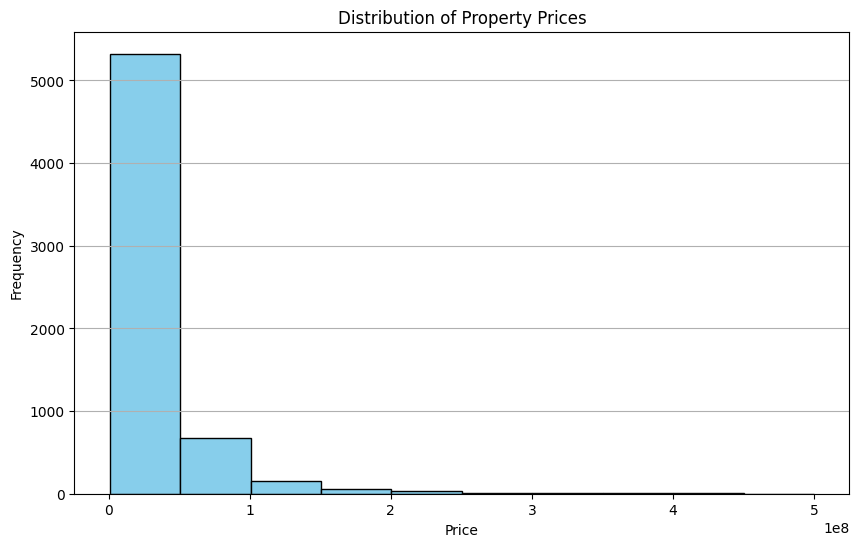

       Price Price_Category
0   14500000         Medium
1   18500000         Medium
2  125000000      Very High
3   16000000         Medium
4   85000000      Very High


C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\3180735513.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


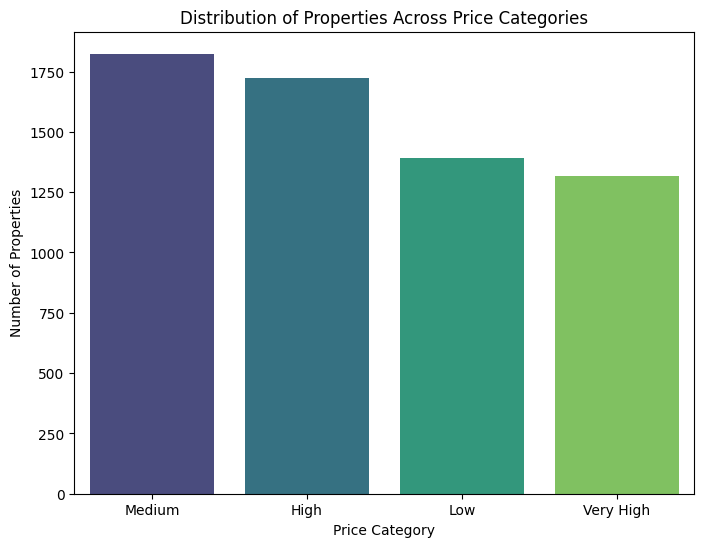


Distribution of Properties Across Price Categories:
Price_Category
Medium       1824
High         1722
Low          1391
Very High    1319
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')

output_path = "Plots/price_distribution.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

def categorize_price(price):
    if price < 10000000:
        return 'Low'
    elif 10000000 <= price < 20000000:
        return 'Medium'
    elif 20000000 <= price < 40000000:
        return 'High'
    else:
        return 'Very High'

X_train_final['Price_Category'] = X_train_final['Price'].apply(categorize_price)
X_test_final['Price_Category'] = X_test_final['Price'].apply(categorize_price)

print(X_train_final[['Price', 'Price_Category']].head())

category_counts = X_train_final['Price_Category'].value_counts()

# Plot the distribution of price categories
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Properties Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Properties')

output_path = "Plots/price_category_distribution.png"
plt.savefig(output_path, bbox_inches='tight')
plt.show()

print("\nDistribution of Properties Across Price Categories:")
print(category_counts)

Original Training Set Distribution (Train Data):
Price_Category
Medium       1824
High         1722
Low          1391
Very High    1319
Name: count, dtype: int64

Distribution After Random Undersampling (Train Data):
Price_Category
High         1319
Low          1319
Medium       1319
Very High    1319
Name: count, dtype: int64

Distribution After Random Oversampling (Train Data):
Price_Category
Medium       1824
Very High    1824
Low          1824
High         1824
Name: count, dtype: int64


C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\1334085866.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_under.value_counts().index, y=y_train_under.value_counts().values, palette='viridis')


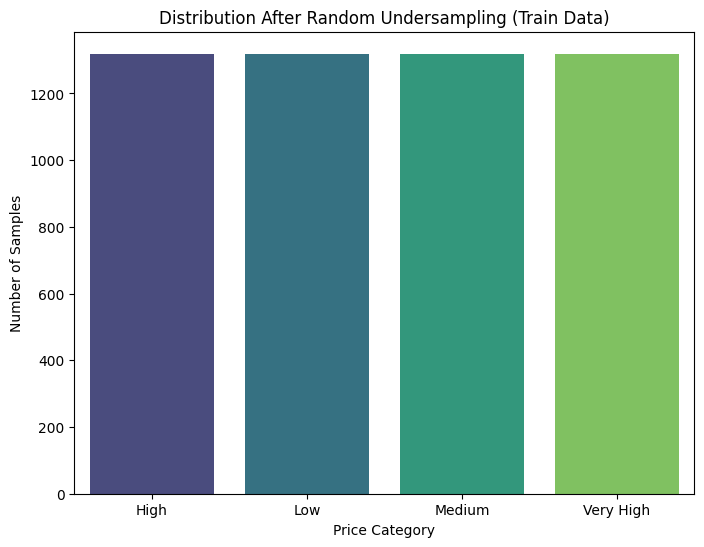

C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\1334085866.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_over.value_counts().index, y=y_train_over.value_counts().values, palette='viridis')


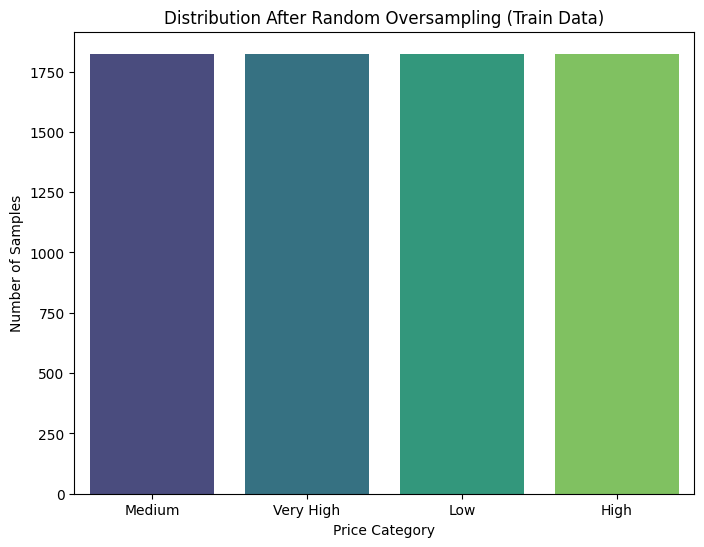

Original Training Set Distribution (Test Data):
Price_Category
High         424
Medium       419
Low          376
Very High    345
Name: count, dtype: int64

Distribution After Random Undersampling (Test Data):
Price_Category
High         345
Low          345
Medium       345
Very High    345
Name: count, dtype: int64

Distribution After Random Oversampling (Test Data):
Price_Category
Medium       424
Very High    424
High         424
Low          424
Name: count, dtype: int64


C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\1334085866.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test_under.value_counts().index, y=y_test_under.value_counts().values, palette='viridis')


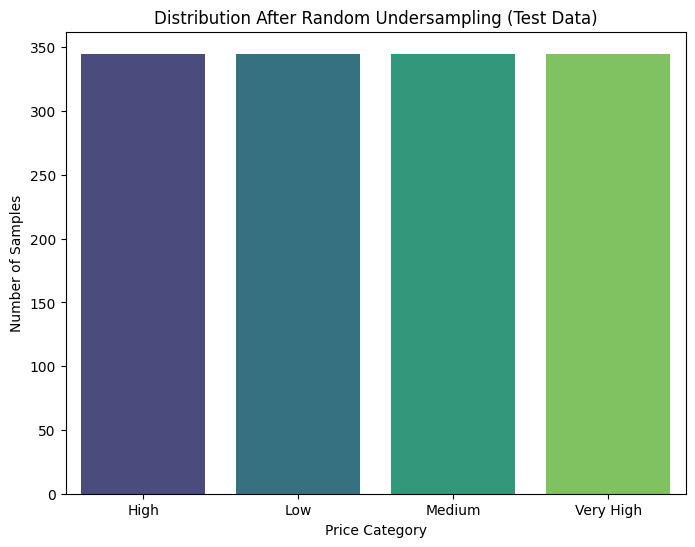

C:\Users\vikra\AppData\Local\Temp\ipykernel_10556\1334085866.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_test_over.value_counts().index, y=y_test_over.value_counts().values, palette='viridis')


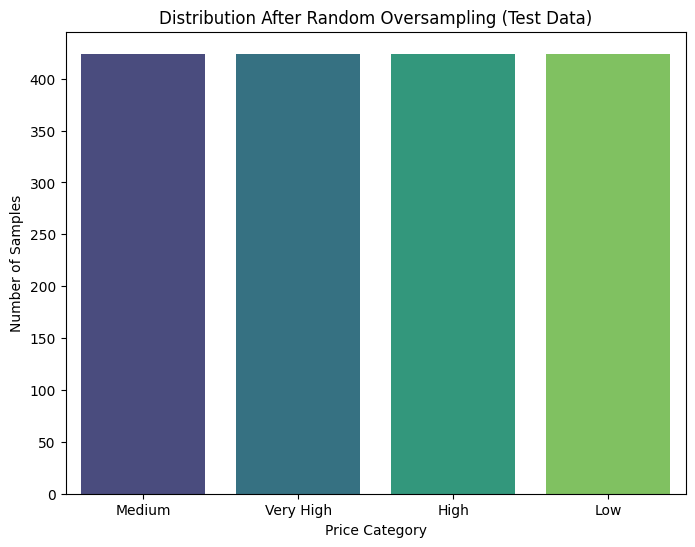

In [ ]:
# Train Data
X_train = X_train_final.drop(columns=['Price_Category'])
y_train = X_train_final['Price_Category']

print("Original Training Set Distribution (Train Data):")
print(y_train.value_counts())

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

undersampled_data = pd.concat([X_train_under, y_train_under], axis=1)
undersampled_data.to_csv('undersampled_train_data.csv', index=False)

print("\nDistribution After Random Undersampling (Train Data):")
print(y_train_under.value_counts())

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

oversampled_data = pd.concat([X_train_over, y_train_over], axis=1)
oversampled_data.to_csv('oversampled_train_data.csv', index=False)

print("\nDistribution After Random Oversampling (Train Data):")
print(y_train_over.value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_under.value_counts().index, y=y_train_under.value_counts().values, palette='viridis')
plt.title('Distribution After Random Undersampling (Train Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/undersampling_train_data_distribution.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_over.value_counts().index, y=y_train_over.value_counts().values, palette='viridis')
plt.title('Distribution After Random Oversampling (Train Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/oversampling_train_data_distribution.png", bbox_inches='tight')
plt.show()


# Test Data
X_test = X_train_final.drop(columns=['Price_Category'])
y_test = test_data['Price_Category']

print("Original Training Set Distribution (Test Data):")
print(y_test.value_counts())

# Apply undersampling
X_test_under, y_test_under = undersampler.fit_resample(X_test, y_test)

undersampled_data = pd.concat([X_test_under, y_test_under], axis=1)
undersampled_data.to_csv('undersampled_test_data.csv', index=False)

print("\nDistribution After Random Undersampling (Test Data):")
print(y_test_under.value_counts())

# Apply oversampling
X_test_over, y_test_over = oversampler.fit_resample(X_test, y_test)

oversampled_data = pd.concat([X_test_over, y_test_over], axis=1)
oversampled_data.to_csv('oversampled_test_data.csv', index=False)

print("\nDistribution After Random Oversampling (Test Data):")
print(y_test_over.value_counts())

plt.figure(figsize=(8, 6))
sns.barplot(x=y_test_under.value_counts().index, y=y_test_under.value_counts().values, palette='viridis')
plt.title('Distribution After Random Undersampling (Test Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/undersampling_test_data_distribution.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_test_over.value_counts().index, y=y_test_over.value_counts().values, palette='viridis')
plt.title('Distribution After Random Oversampling (Test Data)')
plt.xlabel('Price Category')
plt.ylabel('Number of Samples')
plt.savefig("Plots/oversampling_test_data_distribution.png", bbox_inches='tight')
plt.show()